In [2]:
import pandas as pd

df = pd.read_csv ("D:/CarPrice_Assignment.csv")
print (df)

     car_ID  symboling                       CarName fueltype aspiration  \
0         1          3            alfa-romero giulia      gas        std   
1         2          3           alfa-romero stelvio      gas        std   
2         3          1      alfa-romero Quadrifoglio      gas        std   
3         4          2                   audi 100 ls      gas        std   
4         5          2                    audi 100ls      gas        std   
5         6          2                      audi fox      gas        std   
6         7          1                    audi 100ls      gas        std   
7         8          1                     audi 5000      gas        std   
8         9          1                     audi 4000      gas      turbo   
9        10          0           audi 5000s (diesel)      gas      turbo   
10       11          2                      bmw 320i      gas        std   
11       12          0                      bmw 320i      gas        std   
12       13 

In [3]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
#df.info()
from sklearn.preprocessing import LabelEncoder
Enc = LabelEncoder()
cat_df = df.select_dtypes(include='object')
object_columns = cat_df.columns
for attribute in object_columns:
    Enc.fit(df[attribute])
    df[attribute] = Enc.transform(df[attribute])
    


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#g=sns.heatmap(df[top_corr_features].corr, annot='True',cmap='RdYlGn')
g=sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [6]:
df = df[['horsepower','boreratio','enginesize','curbweight','curbweight','carwidth','carlength','wheelbase','drivewheel','enginelocation','price']]

In [7]:
df=(df-df.mean())/df.std()
df.mean(axis=0)

horsepower        1.775003e-16
boreratio        -5.910719e-15
enginesize        2.897411e-17
curbweight        1.261863e-16
curbweight        1.261863e-16
carwidth          1.430401e-14
carlength        -1.011440e-14
wheelbase        -2.013999e-14
drivewheel       -1.646380e-16
enginelocation   -1.371532e-16
price             1.353931e-16
dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [10]:

normalized_df=(df-df.mean())/df.std()
normalized_df.mean(axis=0)
y=normalized_df.price
x=normalized_df.drop('price',axis=1)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)
x_train.head()
x_test,x_validate,y_test,y_validate=train_test_split(x_test,y_test,test_size=0.3)
print(x_validate.shape)
print(x_train.shape)
print(x_test.shape)
x_train

(31, 10)
(102, 10)
(72, 10)


,horsepower,boreratio,enginesize,curbweight,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
126,2.601722,1.514689,1.611151,0.384947,0.384947,-0.423179,-0.417374,-1.537185,1.210367,8.185651
196,0.249921,1.662375,0.338419,0.728728,0.728728,0.602365,1.195622,0.920561,1.210367,-0.121569
141,-0.559301,1.071629,-0.454037,-0.788518,-0.788518,-0.236716,-0.166104,-0.258493,-0.587642,-0.121569
4,0.275209,-0.516003,0.218350,0.515545,0.515545,0.229440,0.206750,0.106848,-2.385652,-0.121569
32,-1.115640,-1.549809,-1.150438,-1.380052,-1.380052,-0.889335,-1.949316,-0.839717,-0.587642,-0.121569
109,-0.179978,0.480882,-0.165871,1.295294,1.295294,1.161752,2.014278,2.564595,1.210367,-0.121569
187,-0.913335,-1.180593,-0.718189,-0.454340,-0.454340,-0.190101,-0.190420,-0.241886,-0.587642,-0.121569
115,-0.179978,0.480882,-0.165871,0.997607,0.997607,1.161752,1.025406,1.518392,1.210367,-0.121569
148,-0.559301,1.071629,-0.454037,-0.260363,-0.260363,-0.236716,-0.036415,-0.308312,-2.385652,-0.121569
10,-0.078825,0.628569,-0.454037,-0.308377,-0.308377,-0.516410,0.222961,0.405763,1.210367,-0.121569


In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers,optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

def build_model():
    model = Sequential()
    model.add(layers.Dense(20,input_dim=(x_train.shape[1]),kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(layers.Dense(8))
    model.add(layers.Dense(6,activation='tanh'))
    #optimizer = optimizers.RMSprop(0.001)
    model.add(Dropout(0.3))
    model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mae'])
    return model
#checked using both activation relu gives more error than tanh that is why using tanh

In [14]:
model = build_model()
history = model.fit(x_train,y_train,epochs=150,batch_size=5,validation_data=(x_validate, y_validate))

Epoch 1/150
21/21 [==============================] - 0s 7ms/step - mae: 0.8622 - loss: 1.4930 - val_mae: 0.6345 - val_loss: 1.1743
Epoch 2/150
21/21 [==============================] - 0s 2ms/step - mae: 0.7684 - loss: 1.2499 - val_mae: 0.5516 - val_loss: 0.9433
Epoch 3/150
21/21 [==============================] - 0s 2ms/step - mae: 0.6842 - loss: 1.0405 - val_mae: 0.4927 - val_loss: 0.8080
Epoch 4/150
21/21 [==============================] - 0s 2ms/step - mae: 0.6729 - loss: 0.9844 - val_mae: 0.4593 - val_loss: 0.7431
Epoch 5/150
21/21 [==============================] - 0s 2ms/step - mae: 0.6404 - loss: 0.8794 - val_mae: 0.4419 - val_loss: 0.7050
Epoch 6/150
21/21 [==============================] - 0s 2ms/step - mae: 0.6122 - loss: 0.8106 - val_mae: 0.4224 - val_loss: 0.6759
Epoch 7/150
21/21 [==============================] - 0s 2ms/step - mae: 0.5934 - loss: 0.8212 - val_mae: 0.4139 - val_loss: 0.6587
Epoch 8/150
21/21 [==============================] - 0s 2ms/step - mae: 0.6056 - lo

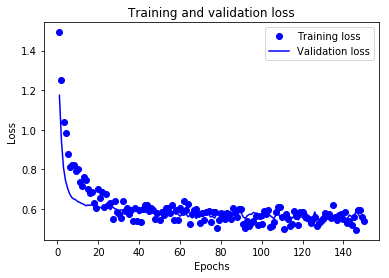

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
import numpy as np
k=4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores = []

In [18]:

for i in range(k):
    print('processing fold #', i+1)
    partial_train_data = np.concatenate([x_train[:i * num_val_samples],x_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples],y_train[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=5, verbose=0)
    scores= model.evaluate(x_validate, y_validate, verbose=0)
    print("Score for fold = ",i+1,"mse= ",scores[0],"loss",scores[1])
        

processing fold # 1
Score for fold =  1 mse=  0.5990230441093445 loss 0.4524846374988556
processing fold # 2
Score for fold =  2 mse=  0.5828668475151062 loss 0.4270685017108917
processing fold # 3
Score for fold =  3 mse=  0.5807279944419861 loss 0.436581552028656
processing fold # 4
Score for fold =  4 mse=  0.5569414496421814 loss 0.4110918939113617


In [21]:
score1= model.predict(x_train)
print('\nAnd the value is ', np.mean(score1[1]))


And the value is  0.1539873
